In [1]:
import fitsio
from astropy.table import Table,join
from matplotlib import pyplot as plt
import numpy as np

# Explore version 3.1 redshift comparison catalogs a little bit
# Look at the file containing everything except the VI

In [2]:
f = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/cascades/3.1/All/alltiles_Allzinfo_wrz.fits')

In [3]:
len(f) #there are a lot of redshift estimates!

8235500

In [11]:
wf = f['FIBERSTATUS'] == 0 #select those that were on good fibers
print(len(f[wf]))
f = f[wf]

6658160


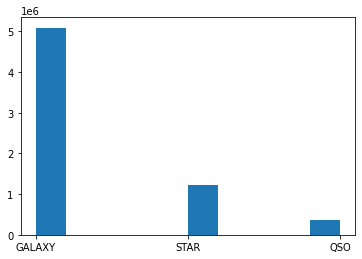

In [13]:
#have a look at their spectype
plt.hist(f['SPECTYPE'])
plt.show()

In [14]:
#how many did redrock think were good?
selgoodz = f['ZWARN'] == 0
print(len(f[selgoodz]))

4655842


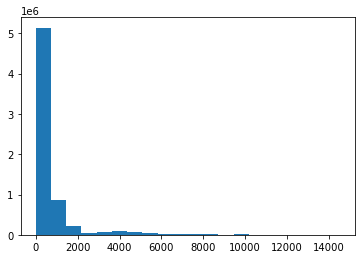

In [16]:
#what is the distribution of effective exposure time?
plt.hist(f['EFFTIME_DARK'],bins=20)
plt.show()

In [18]:
#how many are from single exposure reductions?
sel1exp = f['RZR'] == 'single_exposures'
print(len(f[sel1exp]))

4110768


In [20]:
#how many are from deep reductions and what is their effective exposure time distribution?
seldeep = f['subset'] == 'deep'

410914 good fibers in the deep subset


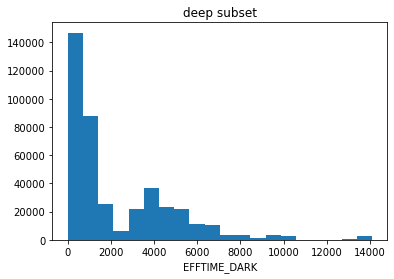

In [21]:
print(str(len(f[seldeep]))+' good fibers in the deep subset')
plt.hist(f[seldeep]['EFFTIME_DARK'],bins=20)
plt.xlabel('EFFTIME_DARK')
plt.title('deep subset')
plt.show()

# so, note that just because it is 'deep' does not mean it will actually be particularly deep

# Now, look at one of the files with the VI information

In [22]:
fe = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/cascades/3.1/ELG/allVItiles_ELGzinfo_wVI.fits') #ELGs

In [23]:
wf = fe['FIBERSTATUS'] == 0
print(len(fe[wf]))
fe = fe[wf]

268417


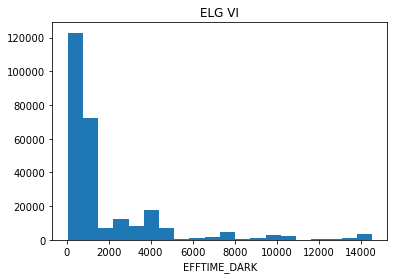

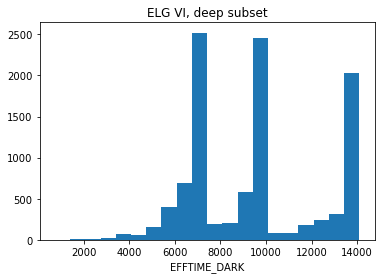

In [24]:
plt.hist(fe['EFFTIME_DARK'],bins=20)
plt.xlabel('EFFTIME_DARK')
plt.title('ELG VI')
plt.show()
seldeep = fe['subset'] == 'deep'
plt.hist(fe[seldeep]['EFFTIME_DARK'],bins=20)
plt.xlabel('EFFTIME_DARK')
plt.title('ELG VI, deep subset')
plt.show()

# The deep subset is indeed quite deep for the VI tiles. How well do the redshifts agree with the VI ones?

(array([5.0558e+04, 1.4162e+05, 7.0181e+04, 3.7840e+03, 1.4330e+03,
        3.0800e+02, 2.2700e+02, 1.0200e+02, 1.7300e+02, 2.5000e+01]),
 array([-2.30000e-03,  6.15930e-01,  1.23416e+00,  1.85239e+00,
         2.47062e+00,  3.08885e+00,  3.70708e+00,  4.32531e+00,
         4.94354e+00,  5.56177e+00,  6.18000e+00]),
 <a list of 10 Patch objects>)

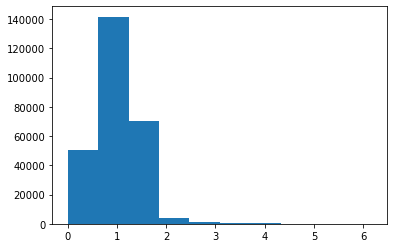

In [26]:
#histogram of the VI redshift
selvi = fe['best_z'] != 1e20 #bad fill values got set to that for some reason
plt.hist(fe[selvi]['best_z'])

In [27]:
#select redshifts in target range with good VI quality
selvi = fe['best_z'] > 0.6
selvi &= fe['best_z'] < 1.6
selvi &= fe['best_quality'] >= 2.5
print(len(fe[selvi]))
fevi = fe[selvi]

167429


(array([ 1095.,  2475.,  3907.,  6262.,  8166.,  9192.,  8532., 10387.,
         9005.,  8281.,  8788.,  7105.,  6504.,  6238.,  6185.,  4961.,
         4659.,  6335.,  4970.,  5217.,  4758.,  4760.,  4604.,  3599.,
         4228.,  3852.,  4317.,  2700.,  2892.,  3455.]),
 array([0.6005    , 0.63381333, 0.66712667, 0.70044   , 0.73375333,
        0.76706667, 0.80038   , 0.83369333, 0.86700667, 0.90032   ,
        0.93363333, 0.96694667, 1.00026   , 1.03357333, 1.06688667,
        1.1002    , 1.13351333, 1.16682667, 1.20014   , 1.23345333,
        1.26676667, 1.30008   , 1.33339333, 1.36670667, 1.40002   ,
        1.43333333, 1.46664667, 1.49996   , 1.53327333, 1.56658667,
        1.5999    ]),
 <a list of 30 Patch objects>)

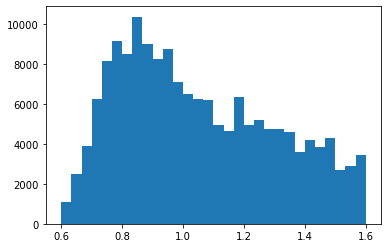

In [29]:
#look at redshift histogram for selection
plt.hist(fevi['best_z'],bins=30)

In [30]:
seldeep = fevi['subset'] == 'deep'
fevid = fevi[seldeep]
print(len(fevid))

6466


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 3.000e+00,
        1.800e+01, 4.100e+01, 3.023e+03, 3.180e+03, 3.300e+01, 4.000e+00,
        1.000e+01, 8.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([-0.003 , -0.0028, -0.0026, -0.0024, -0.0022, -0.002 , -0.0018,
        -0.0016, -0.0014, -0.0012, -0.001 , -0.0008, -0.0006, -0.0004,
        -0.0002,  0.    ,  0.0002,  0.0004,  0.0006,  0.0008,  0.001 ,
         0.0012,  0.0014,  0.0016,  0.0018,  0.002 ,  0.0022,  0.0024,
         0.0026,  0.0028,  0.003 ]),
 <a list of 30 Patch objects>)

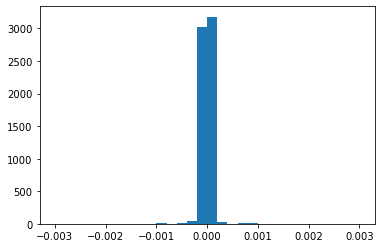

In [36]:
#histogram of difference in redshift
plt.hist(fevid['Z']-fevid['best_z'],range=(-0.003,0.003),bins=30)

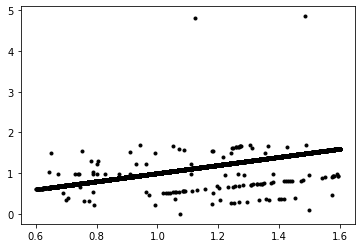

In [37]:
plt.plot(fevid['best_z'],fevid['Z'],'k.')

### basically, they either agree almost perfectly or disagree strongly

In [38]:
selbad = abs(fevid['Z']-fevid['best_z']) > 0.005
print(len(fevid[selbad]),len(fevid),len(fevid[selbad])/len(fevid))

131 6466 0.020259820600061863


### so 2% of the deep results are catastrophic failures according to VI

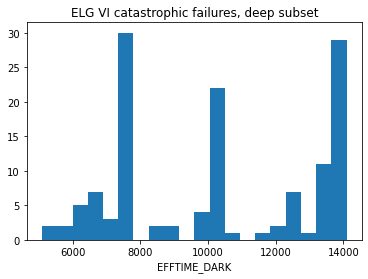

In [39]:
plt.hist(fevid[selbad]['EFFTIME_DARK'],bins=20)
plt.xlabel('EFFTIME_DARK')
plt.title('ELG VI catastrophic failures, deep subset')
plt.show()

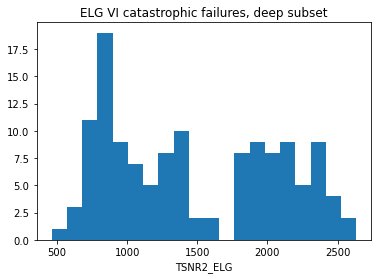

In [40]:
plt.hist(fevid[selbad]['TSNR2_ELG'],bins=20)
plt.xlabel('TSNR2_ELG')
plt.title('ELG VI catastrophic failures, deep subset')
plt.show()

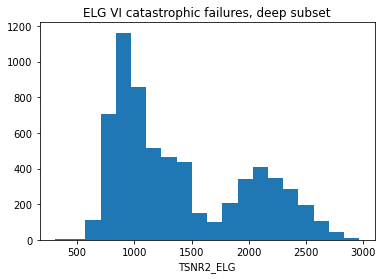

In [41]:
plt.hist(fevid['TSNR2_ELG'],bins=20)
plt.xlabel('TSNR2_ELG')
plt.title('ELG VI catastrophic failures, deep subset')
plt.show()